In [635]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

os.chdir('/Users/jennlauralee/GitHub Repos/Space-Number/DATA')


In [569]:
alldata = pd.read_pickle('alldata.pkl')
alldata.reset_index(drop=True, inplace=True)


Num_block                                                      1
Block_ID                                                       4
Trial_ID                                                     113
Resp_loc                                                      56
Resp_conf                                                     34
Correct                                                        1
RT_resp                                                  1.10721
RT_conf                                                 0.475745
Wager                                                          3
x                                                            NaN
N                                                              4
x_mean                                                   57.6097
Mouse_track    [[92.625, 92.625, 92.625, 92.625, 92.625, 92.6...
X              [[42.60137822243971, 46.48265487369186, 68.156...
Sub_ID                                                         6
resperror                

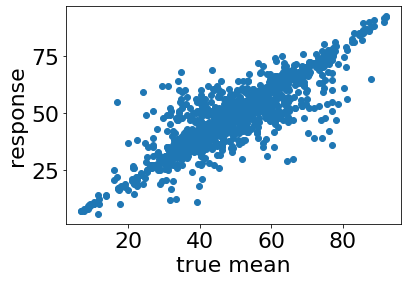

In [695]:
plt.figure()

subdata = alldata[alldata["Sub_ID"]==1]
plt.scatter(subdata.x_mean,subdata.Resp_loc)
plt.xlabel('true mean')
plt.ylabel('response')

alldata[alldata.Sub_ID == 6].iloc[562]


In [694]:
resperror=[]
for ii in alldata.index.values:
    resperror.append(np.abs(alldata.x_mean[ii] - alldata.Resp_loc[ii]))

stimstd=[]
for ii in alldata.index.values:
    stimstd.append(np.std(alldata.X[ii]))
    
stimrange=[]
for ii in alldata.index.values:
    stimrange.append(np.abs(np.max(alldata.X[ii])- np.min(alldata.X[ii])))    
    
alldata['resperror'] = resperror
alldata['stimstd'] = stimstd
alldata['stimrange'] = stimrange


numdata = alldata[alldata["Num_block"]==1]
spacedata = alldata[alldata["Num_block"]==0]



In [583]:
# stim_mu_bins = pd.qcut(alldata['x_mean'],q=5, labels=range(1,6))
# stim_std_bins = pd.qcut(alldata['stimstd'],q=5, labels=range(1,6))
# stim_range_bins = pd.qcut(alldata['stimrange'],q=5, labels=range(1,6))
# error_bins = pd.qcut(alldata['resperror'],q=5, labels=range(1,6))

# alldata['stim_bins'] = stim_mu_bins
# alldata['stim_std_bins'] = stim_std_bins
# alldata['stim_range_bins'] = stim_range_bins
# alldata['error_bins'] = error_bins


numdata['stim_bins'] = pd.qcut(numdata['x_mean'],q=5, labels=range(1,6))
numdata['stim_std_bins'] = pd.qcut(numdata['stimstd'],q=5, labels=range(1,6))
numdata['stim_range_bins'] = pd.qcut(numdata['stimrange'],q=5, labels=range(1,6))
numdata['error_bins'] = pd.qcut(numdata['resperror'],q=5, labels=range(1,6))

spacedata['stim_bins'] = pd.qcut(spacedata['x_mean'],q=5, labels=range(1,6))
spacedata['stim_std_bins'] = pd.qcut(spacedata['stimstd'],q=5, labels=range(1,6))
spacedata['stim_range_bins'] = pd.qcut(spacedata['stimrange'],q=5, labels=range(1,6))
spacedata['error_bins'] = pd.qcut(spacedata['resperror'],q=5, labels=range(1,6))


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


6000

In [573]:
spacedata

,Num_block,Block_ID,Trial_ID,Resp_loc,Resp_conf,Correct,RT_resp,RT_conf,Wager,x,...,Mouse_track,X,Sub_ID,resperror,stimstd,stimrange,stim_bins,stim_std_bins,stim_range_bins,error_bins
150,0.0,2.0,1.0,59.125,8.50,1.0,6.219401,1.389053,10.0,NaN,...,"[[65.375, 65.375, 65.375, 65.375, 65.375, 65.3...","[[27.561350709720255, 91.05590937483646]]",1,0.183630,31.747279,63.494559,4,5,3,1
151,0.0,2.0,2.0,41.250,3.25,0.0,7.323906,0.637168,0.0,NaN,...,"[[82.25, 82.25, 82.25, 82.25, 82.25, 82.25, 82...","[[1.968793574106853, 22.436266620259893, 82.73...",1,5.537589,34.281899,80.763379,1,5,5,5
152,0.0,2.0,3.0,46.750,1.00,1.0,3.691938,1.105375,14.0,NaN,...,"[[72.375, 72.375, 72.375, 72.375, 72.375, 72.3...","[[45.9537808440055, 48.0507807182882]]",1,0.252281,1.048500,2.097000,3,1,1,1
153,0.0,2.0,4.0,72.625,4.25,0.0,4.463118,0.504659,0.0,NaN,...,"[[18.75, 18.75, 18.75, 18.75, 18.75, 18.75, 18...","[[28.904310148303548, 77.02124375071173, 77.69...",1,11.417752,22.843288,48.791880,4,3,2,5
154,0.0,2.0,5.0,62.250,4.50,0.0,13.253822,0.701823,0.0,NaN,...,"[[88.75, 88.75, 88.75, 88.75, 88.75, 88.75, 88...","[[24.79895944733489, 30.134115561015594, 57.54...",1,5.298523,26.413049,65.274328,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,8.0,146.0,51.125,3.00,0.0,3.542255,1.220840,0.0,NaN,...,"[[23.375, 23.375, 23.375, 23.375, 23.375, 23.3...","[[3.788081938621457, 95.13586422606436]]",10,1.663027,45.673891,91.347782,3,5,5,3
11996,0.0,8.0,147.0,55.250,7.00,1.0,0.971129,0.565313,11.0,NaN,...,"[[10.125, 10.125, 10.125, 10.125, 10.125, 10.1...","[[6.984594447953285, 62.79502675141197, 88.098...",10,2.623837,33.886435,81.114275,3,5,5,3
11997,0.0,8.0,148.0,39.125,7.75,1.0,1.134452,0.753456,10.0,NaN,...,"[[46.625, 46.625, 46.625, 46.625, 46.625, 46.6...","[[1.2733833047742449, 15.903823302684984, 35.7...",10,1.999789,35.901594,94.316023,1,5,5,3
11998,0.0,8.0,149.0,66.125,7.25,1.0,2.057254,0.938607,10.0,NaN,...,"[[55.75, 55.75, 55.75, 55.75, 55.75, 55.75, 55...","[[23.715076554884394, 34.094428659606734, 76.4...",10,0.581476,30.995792,73.935390,5,5,4,2


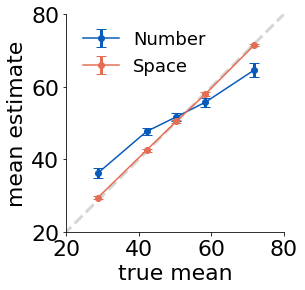

In [637]:
plt.figure(0)
plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_loc.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

plt.plot([0,100],[0,100],linewidth=3,linestyle='dashed',color='666666')
sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('mean estimate')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)
plt.xlim(20,80)
plt.ylim(20,80)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


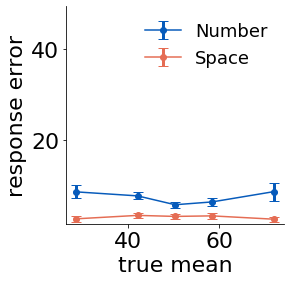

In [638]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).resperror.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('response error')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


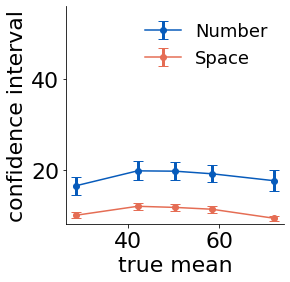

In [639]:
plt.figure(1)

plt.errorbar(numdata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_bins']).x_mean.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_bins']).Resp_conf.mean().groupby(['stim_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('true mean')
plt.ylabel('confidence interval')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

#plt.xticks(np.arange(0, 101, step=50))
#plt.yticks(np.arange(0, 101, step=50))


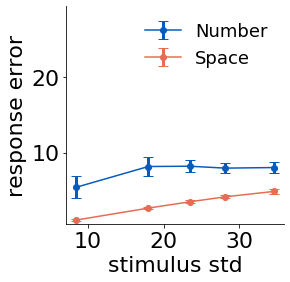

In [640]:
plt.figure(2)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).resperror.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('response error')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

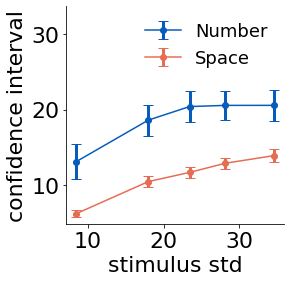

In [641]:
plt.figure(2)

plt.errorbar(numdata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_std_bins']).stimstd.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_std_bins']).Resp_conf.mean().groupby(['stim_std_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus std')
plt.ylabel('confidence interval')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

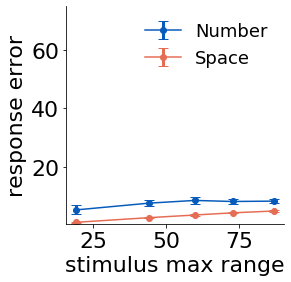

In [642]:
plt.figure(3)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).resperror.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus max range')
plt.ylabel('response error')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

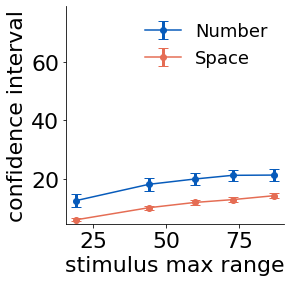

In [643]:
plt.figure(3)

plt.errorbar(numdata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).mean(),
             numdata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','stim_range_bins']).stimrange.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).mean(),
             spacedata.groupby(['Sub_ID','stim_range_bins']).Resp_conf.mean().groupby(['stim_range_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('stimulus max range')
plt.ylabel('confidence interval')
plt.axis('square')
plt.legend(frameon=False,fontsize=18)

plt.show()

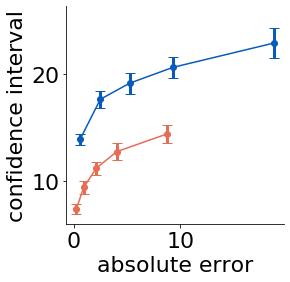

error_bins
1    0.518621
2    0.806932
3    0.998492
4    0.984042
5    1.440642
Name: Resp_conf, dtype: float64

In [674]:
plt.figure(4)

plt.errorbar(numdata.groupby(['Sub_ID','error_bins']).resperror.mean().groupby(['error_bins']).mean(),
             numdata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).mean(),
             numdata.groupby(['Sub_ID','error_bins']).Resp_conf.std().groupby(['error_bins']).sem(),
             fmt='o-',color='#075BBB',ecolor='#075BBB', elinewidth=3, capsize=5, label='Number')

plt.errorbar(spacedata.groupby(['Sub_ID','error_bins']).resperror.mean().groupby(['error_bins']).mean(),
             spacedata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).mean(),
             spacedata.groupby(['Sub_ID','error_bins']).Resp_conf.mean().groupby(['error_bins']).sem(),
             fmt='o-',color='#E56D54',ecolor='#E56D54', elinewidth=3, capsize=5, label='Space')

sns.despine()
plt.rcParams.update({'font.size': 22})
plt.xlabel('absolute error')
plt.ylabel('confidence interval')
plt.axis('square')
#plt.legend(frameon=False,fontsize=18)

plt.show()

numdata.groupby(['Sub_ID','error_bins']).Resp_conf.std().groupby(['error_bins']).sem()